<a href="https://colab.research.google.com/github/RNikhitha/Image-Classification/blob/main/Rock%2CPaper%2CScissors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras

# Datasets
List of Datasets

In [4]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'aloha_mobile',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asqa',
 'asset',
 'assin2',
 'asu_table_top_converted_externally_to_rlds',
 'austin_buds_dataset_converted_externally_to_rlds',
 'austin_sailor_dataset_converted_externally_to_rlds',
 'austin_sirius_dataset_converted_externally_to_rlds',
 'bair_robot_pushing_small',
 'bc_z',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'berkeley_autolab_ur5',
 'berkeley_cable_routing',
 'berkeley_fanuc_manipulation',
 'berkeley_gnm_cory_hall',
 'berkeley_gnm_recon',
 'berkeley_gnm_sac_son',
 'berkeley_mvp_converted_externally_to_rlds',
 'berkeley_rpt_converted_externally_to_rlds',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'ble_wind_field',
 'blimp',
 'booksum',
 'bool_q',
 'bot_adversarial_dialogue',
 'bridge',
 'bridge_data_msr',
 'bucc',
 'c4',
 'c4_wsrs',
 'caltech10

In [5]:
builder = tfds.builder('rock_paper_scissors')
info = builder.info
info

tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    full_name='rock_paper_scissors/3.0.0',
    description="""
    Images of hands playing rock, paper, scissor game.
    """,
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    data_dir='/root/tensorflow_datasets/rock_paper_scissors/3.0.0',
    file_format=tfrecord,
    download_size=219.53 MiB,
    dataset_size=219.23 MiB,
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=3),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=372, num_shards=1>,
        'train': <SplitInfo num_examples=2520, num_shards=2>,
    },
    citation="""@ONLINE {rps,
    author = "Laurence Moroney",
    title = "Rock, Paper, Scissors Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/rock-paper-scissors-dataset"
    }""",

# Data PreProcessing

In [6]:
data_train = tfds.load(name="rock_paper_scissors", split="train")
data_test = tfds.load(name="rock_paper_scissors", split="test")

In [7]:
#printing the dataset
for example in data_train.take(1):
  print(example)

{'image': <tf.Tensor: shape=(300, 300, 3), dtype=uint8, numpy=
array([[[254, 254, 254],
        [253, 253, 253],
        [254, 254, 254],
        ...,
        [251, 251, 251],
        [250, 250, 250],
        [250, 250, 250]],

       [[254, 254, 254],
        [254, 254, 254],
        [253, 253, 253],
        ...,
        [250, 250, 250],
        [251, 251, 251],
        [249, 249, 249]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [251, 251, 251],
        [250, 250, 250],
        [252, 252, 252]],

       ...,

       [[252, 252, 252],
        [251, 251, 251],
        [252, 252, 252],
        ...,
        [247, 247, 247],
        [249, 249, 249],
        [248, 248, 248]],

       [[253, 253, 253],
        [253, 253, 253],
        [251, 251, 251],
        ...,
        [248, 248, 248],
        [248, 248, 248],
        [248, 248, 248]],

       [[252, 252, 252],
        [253, 253, 253],
        [252, 252, 252],
        ...,
        [24

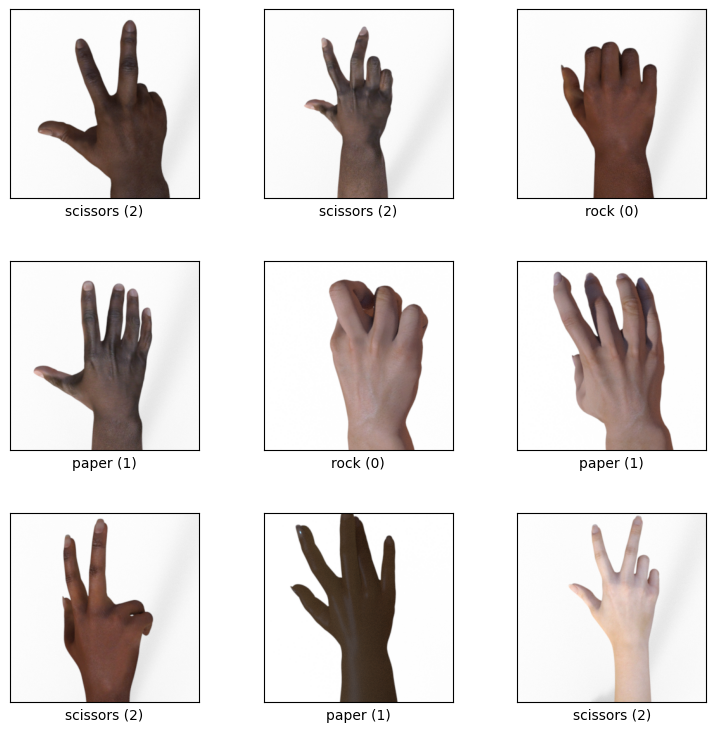

In [8]:
img = tfds.show_examples(data_train, info)

Understanding (Data Type)

In [9]:
train_images = np.array([example['image'].numpy() for example in data_train])
type(train_images[0])

numpy.ndarray

array([[[254, 254, 254],
        [253, 253, 253],
        [254, 254, 254],
        ...,
        [251, 251, 251],
        [250, 250, 250],
        [250, 250, 250]],

       [[254, 254, 254],
        [254, 254, 254],
        [253, 253, 253],
        ...,
        [250, 250, 250],
        [251, 251, 251],
        [249, 249, 249]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [251, 251, 251],
        [250, 250, 250],
        [252, 252, 252]],

       ...,

       [[252, 252, 252],
        [251, 251, 251],
        [252, 252, 252],
        ...,
        [247, 247, 247],
        [249, 249, 249],
        [248, 248, 248]],

       [[253, 253, 253],
        [253, 253, 253],
        [251, 251, 251],
        ...,
        [248, 248, 248],
        [248, 248, 248],
        [248, 248, 248]],

       [[252, 252, 252],
        [253, 253, 253],
        [252, 252, 252],
        ...,
        [248, 248, 248],
        [247, 247, 247],
        [250, 250, 250]]], dtype=uint8)
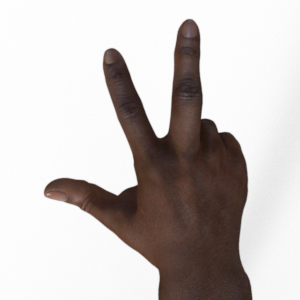

In [10]:
train_images[0]

In [11]:
train_images.shape

(2520, 300, 300, 3)

array([[254, 253, 254, ..., 252, 250, 250],
       [253, 255, 253, ..., 251, 251, 250],
       [254, 253, 254, ..., 252, 250, 251],
       ...,
       [253, 252, 252, ..., 249, 249, 250],
       [252, 252, 251, ..., 248, 248, 249],
       [251, 252, 253, ..., 248, 249, 250]], dtype=uint8)
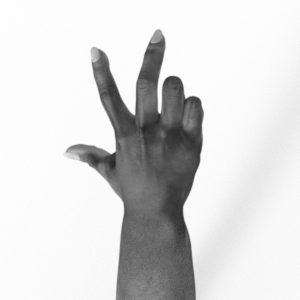

In [12]:
#change to grey scale
train_images = np.array([example['image'].numpy()[:,:,0] for example in data_train])
train_images[1]

In [13]:
train_images.shape

(2520, 300, 300)

In [14]:
train_labels = np.array([example['label'].numpy()for example in data_train])
train_labels[0]

2

In [15]:
# overall data prep
train_images = np.array([example['image'].numpy()[:,:,0]for example in data_train])
train_labels = np.array([example['label'].numpy()for example in data_train])

test_images = np.array([example['image'].numpy()[:,:,0]for example in data_test])
test_labels = np.array([example['label'].numpy()for example in data_test])

In [16]:
#Processing the data
train_images = train_images.reshape(2520, 300, 300, 1)
test_images = test_images.reshape(372, 300, 300, 1)

train_images = train_images / 255.0
test_images = test_images / 255.0

# Building Model using Convolutional Approach

In [45]:
c_model = keras.Sequential([
    keras.layers.Conv2D(64, 3, activation='relu', input_shape=(300,300,1)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(32, 3, activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(32, 3, activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(3, activation='softmax')

])

c_model.compile(optimizer='adam',
                loss=keras.losses.SparseCategoricalCrossentropy(),
                metrics=['accuracy'])
c_model.fit(train_images,train_labels, epochs=5, batch_size=32)

Epoch 1/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 100ms/step - accuracy: 0.4542 - loss: 1.1617
Epoch 2/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - accuracy: 0.9673 - loss: 0.1373
Epoch 3/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - accuracy: 0.9867 - loss: 0.0455
Epoch 4/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - accuracy: 0.9980 - loss: 0.0100
Epoch 5/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - accuracy: 0.9974 - loss: 0.0104


In [46]:
c_model.evaluate(test_images, test_labels)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.7627 - loss: 1.1531


[1.2619266510009766, 0.7446236610412598]

In [47]:
c_model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)                   │ (None, 298, 298, 64)        │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 149, 149, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 147, 147, 32)        │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 73, 73, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 71, 71, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 35, 35, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 39200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 39200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 128)                 │       5,017,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,188,939 (57.94 MB)

 Trainable params: 5,062,979 (19.31 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,125,960 (38.63 MB)

# Testing the Model (random example)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
True Label: scissors
Predicted Label: scissors


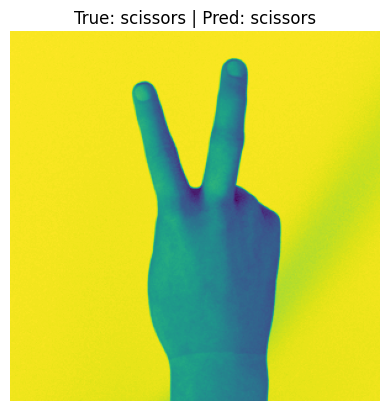

The model prediction is correct!


In [48]:
import random
class_names = ['rock', 'paper', 'scissors']
def check_random_image(model, test_images, test_labels, class_names):
    random_idx = random.randint(0, len(test_images) - 1)

    # Get the image and its true label
    random_image = test_images[random_idx]
    true_label = test_labels[random_idx]

    # Predict the label
    prediction = model.predict(np.expand_dims(random_image, axis=0))
    predicted_label = np.argmax(prediction, axis=1)[0]

    # Print the results
    print(f"True Label: {class_names[true_label]}")
    print(f"Predicted Label: {class_names[predicted_label]}")

    # Display the image
    plt.imshow(random_image)
    plt.title(f"True: {class_names[true_label]} | Pred: {class_names[predicted_label]}")
    plt.axis('off')
    plt.show()

    # Check if the prediction is correct
    if predicted_label == true_label:
        print("The model prediction is correct!")
    else:
        print("The model prediction is incorrect.")

check_random_image(c_model, test_images, test_labels, class_names)